作業 1：

延續使用者資料的導入使用，除了， "文字檔"，"網路資訊"，還有圖像檔；

所以嘗試使用一張"earth_lights_lrg.jpg" 搭配不同的投影方式繪製地圖

來自美國宇航局的大理石圖像 (http://visibleearth.nasa.gov)

使用地圖投影：

說明使用 warpimage method 方法顯示圖像背景。
在地圖投影區域。 預設背景是『藍色』


作業 2：

讀入 etopo5 地形/降水量資料集："etopo5.cdf". 繪製分布圖

In [5]:
!pip install netCDF4

In [38]:
import os
os.environ['PROJ_LIB'] = 'C:/Users/Jennifer/Anaconda3/Lib/site-packages/mpl_toolkits/basemap/data'

from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset


In [39]:
etopodata = Dataset('etopo5.cdf')


C:\Users\jennifer\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jennifer\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\jennifer\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


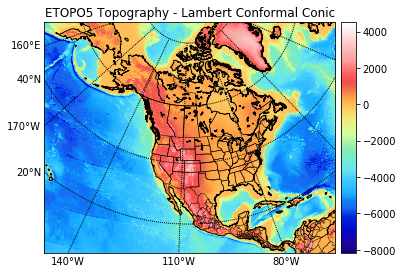

In [40]:
topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
topoin,lons = shiftgrid(180.,topoin,lons,start=False)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
im = m.imshow(topodat,cm.GMT_haxby)

m.drawcoastlines()#海岸線
m.drawstates()#州線
m.drawcountries()#國界線

parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,1])
meridians = np.arange(10.,360.,30.)
m.drawmeridians(meridians,labels=[1,0,0,1])
cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
plt.show()

C:\Users\jennifer\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


warp to orthographic map ...


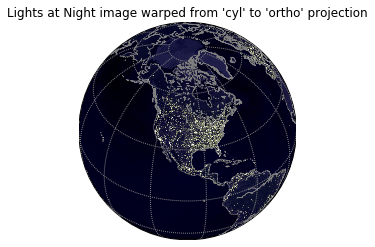

In [16]:
from __future__ import (absolute_import, division, print_function)

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

# 說明使用warpimage method 方法顯示圖像背景。
# 在地圖投影區域。 預設背景是『藍色。
#來自美國宇航局的大理石圖像 (http://visibleearth.nasa.gov)

# 建立新圖像
fig=plt.figure()
# 定義以北美為中心的正交投影.
m = Basemap(projection='ortho',lat_0=40,lon_0=-100,resolution='l')
# 顯示非預設影像 - 匯入要使用的IMAGE
m.warpimage(image='earth_lights_lrg.jpg')
# 繪製海岸線。
m.drawcoastlines(linewidth=0.5,color='0.5')
# 每 30 度繪製一組 lat/lon 網格線。
m.drawmeridians(np.arange(0,360,30),color='0.5')
m.drawparallels(np.arange(-90,90,30),color='0.5')
#添加圖示標題
plt.title("Lights at Night image warped from 'cyl' to 'ortho' projection",fontsize=12)
print('warp to orthographic map ...')

C:\Users\jennifer\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


plot native cylindrical map (no warping needed) ...


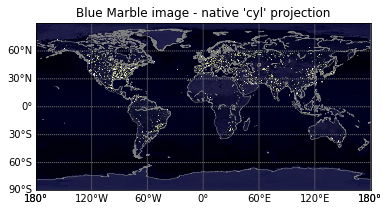

In [41]:
fig=plt.figure()
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='l')
# 繪圖 (未扭曲) rgba 圖像
im = m.bluemarble(scale=0.5)
m.warpimage(image='earth_lights_lrg.jpg')
# 繪製海岸線。
m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='0.5')
m.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='0.5')

m.drawcoastlines(linewidth=0.5,color='0.5')

# 輸出圖像標題
plt.title("Blue Marble image - native 'cyl' projection",fontsize=12)
print('plot native cylindrical map (no warping needed) ...')

plt.show()